# Practica 9

In [34]:
import scipy
import numpy as np
import pandas as pd
import seaborn as sns
import seaborn.objects as so
import matplotlib.pyplot as plt

# Para clustering
from sklearn.datasets import make_blobs
from sklearn.datasets import make_circles
from sklearn.preprocessing import MinMaxScaler 
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

In [35]:
#Funcion de Kmedias
def distancias_a_centros(datos, centros):
    k = len(centros)
    nDatos = len(datos)
    distMatrix = np.zeros((nDatos, k))
    for i, centro in enumerate(centros):
        dist = np.linalg.norm(datos - centro, axis = 1)
        distMatrix[:,i] = dist
    return(distMatrix)

def calcular_etiquetas(datos, centros):
    distMatrix = distancias_a_centros(datos, centros)
    etiquetas = np.argmin(distMatrix, axis = 1)   # Array de enteros
    return(pd.Series(etiquetas.astype("str")))  # Convertimos los enteros a strings

def calcular_centros(datos, etiquetas):
    centros = np.zeros((4,2))
    for i, etiqueta in enumerate(etiquetas.unique()):
        cluster = datos[etiquetas == etiqueta, :]
        centro = cluster.mean(axis = 0)
        centros[i] = centro
    return(centros)

def kmedias(datos, centros, n):
    centrosNuevos = centros.copy()
    for i in range(n):
        etiquetas = calcular_etiquetas(datos, centrosNuevos)
        centrosNuevos = calcular_centros(datos, etiquetas)
    return(etiquetas)

Ejercicio 1 pendiente ya que no tengo ganas de debugear el codigo

## Ejercicio 1

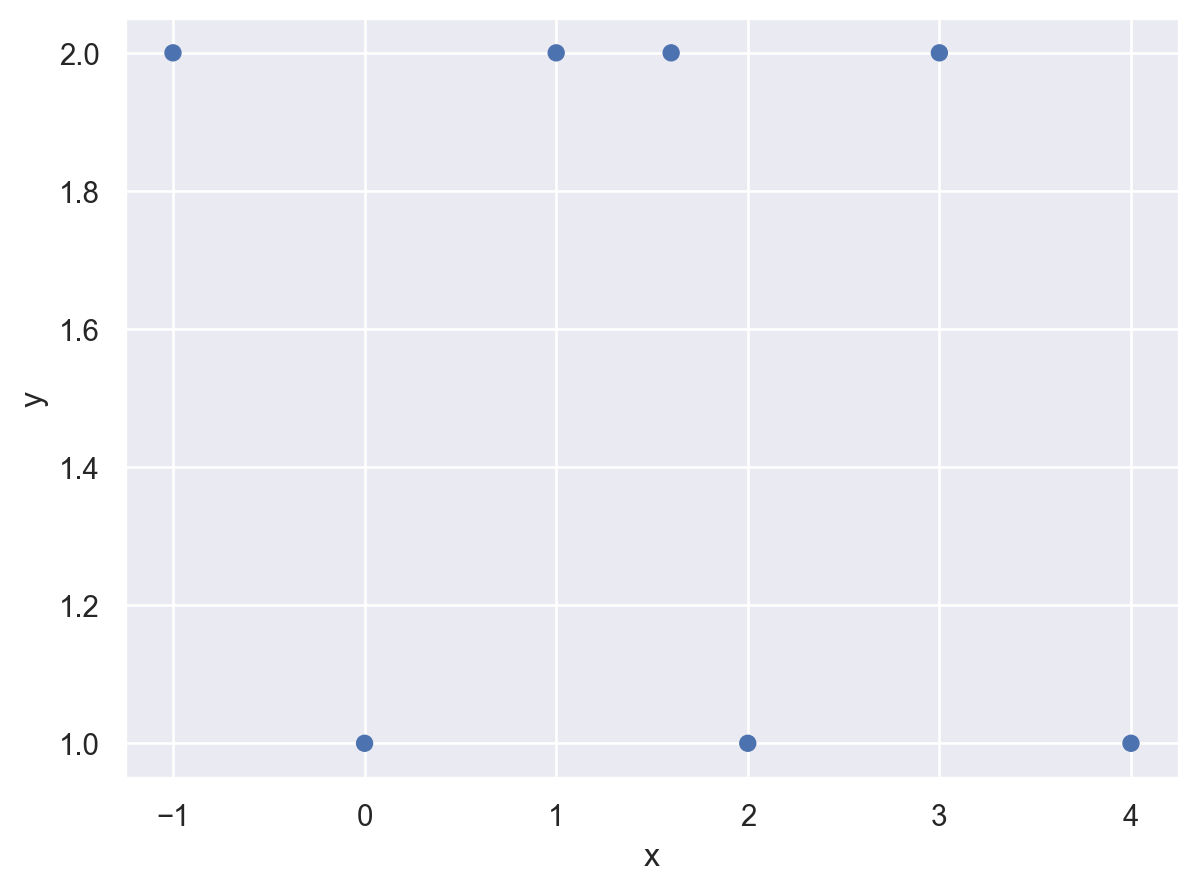

In [36]:
tabla = pd.DataFrame({"x":[-1,0,1,8/5,2,3,4], "y":[2,1,2,2,1,2,1]})

so.Plot(data=tabla, x="x",y="y").add(so.Dot())

### a

In [37]:
kmedias(tabla, np.array([[1,2],[3,2]]),2)

InvalidIndexError: (0     True
1     True
2     True
3     True
4     True
5    False
6    False
dtype: bool, slice(None, None, None))

## Ejercicio 2

### a

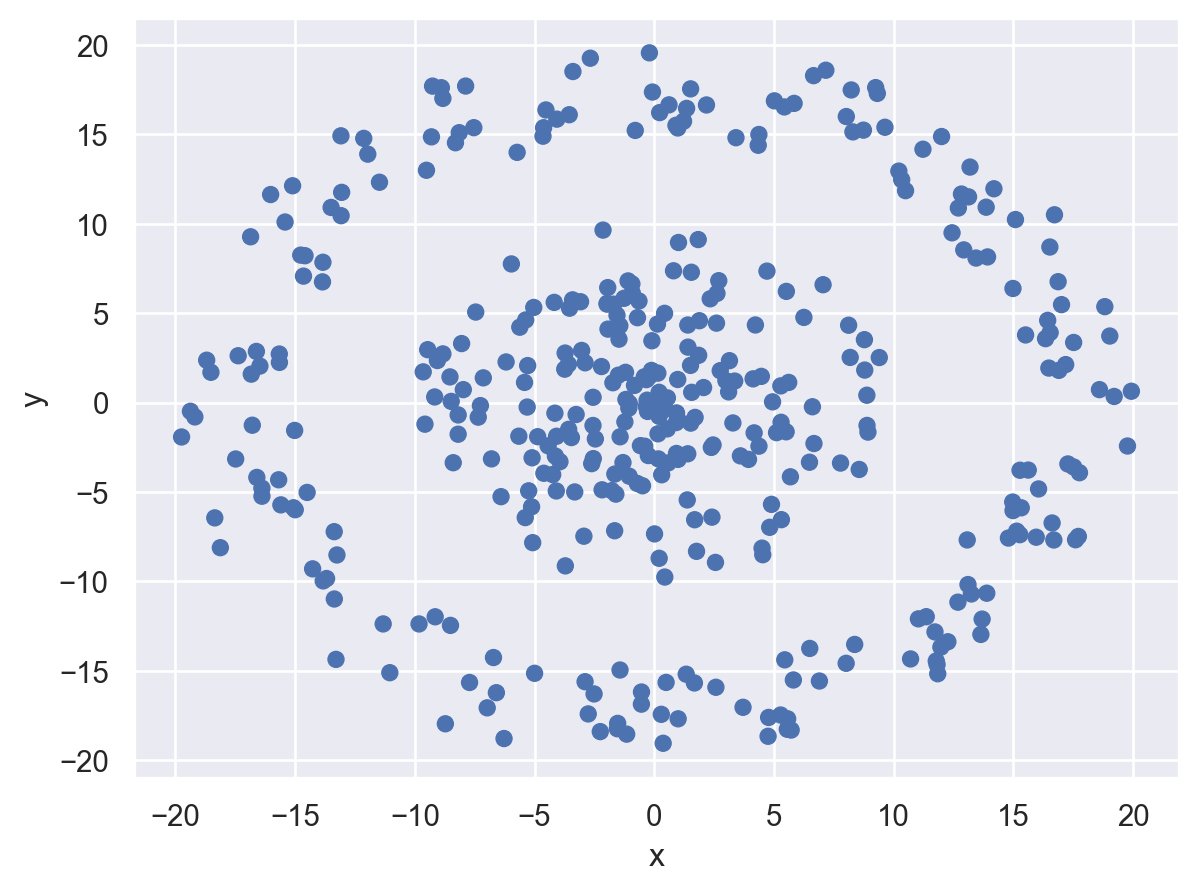

In [48]:
data1 = pd.read_csv("../../Datasets/p7-data1.csv")

so.Plot(data = data1, x="x",y="y").add(so.Dot())

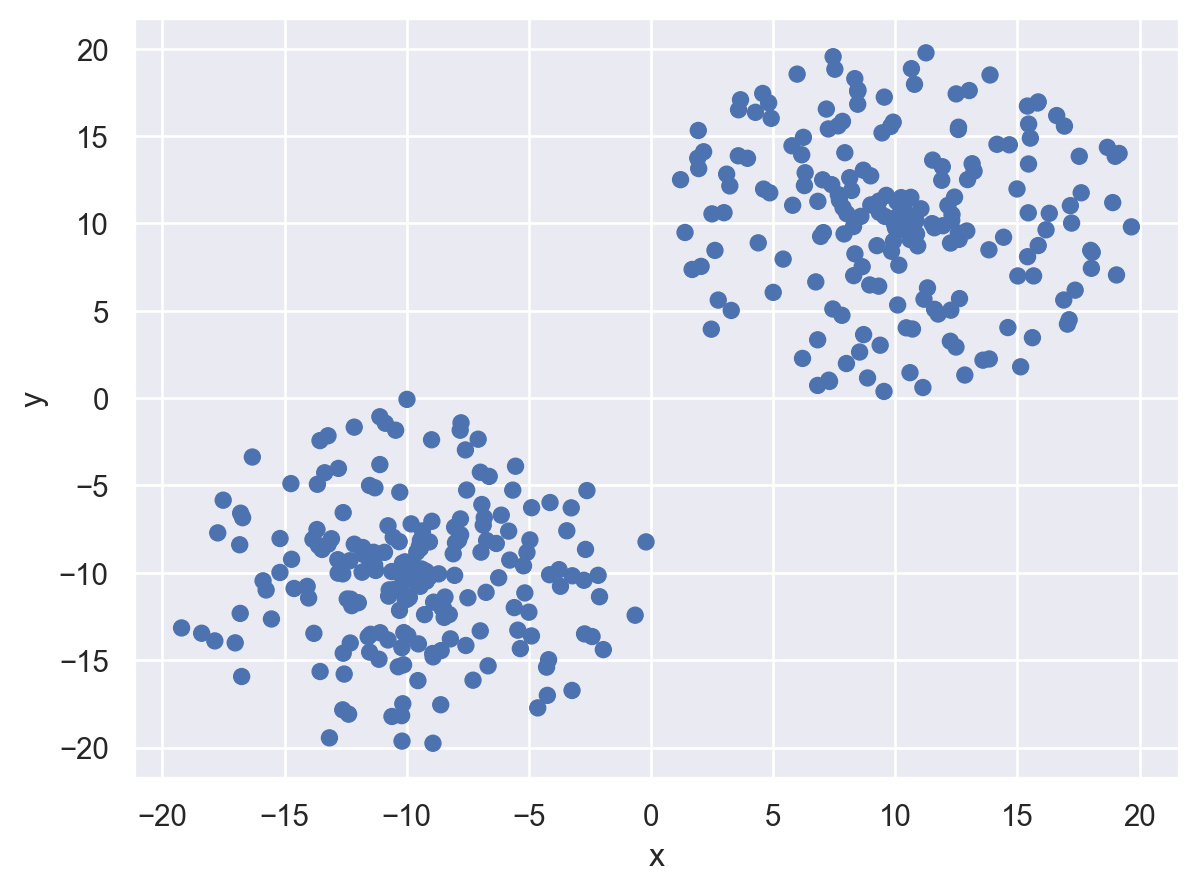

In [49]:
data2 = pd.read_csv("../../Datasets/p7-data2.csv")

so.Plot(data = data2, x="x",y="y").add(so.Dot())

### b

Se puede ver como en ambos hay 2 clusters bien definidos

### c

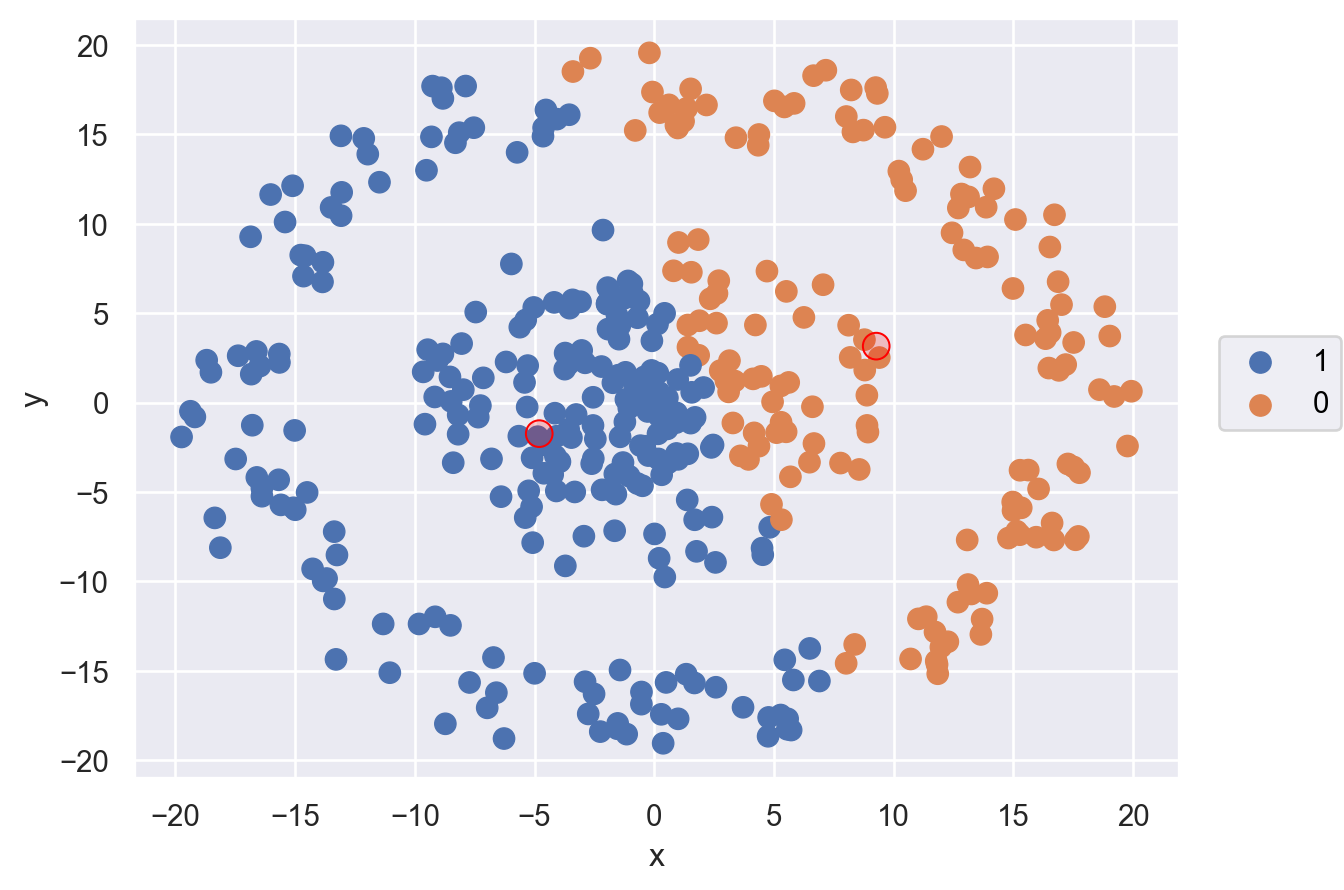

In [50]:
#Seteo de KMeans con 2 Clusters
kmeans = KMeans(n_clusters=2)

#Fiteo de la data que tenemos
etiquetas = kmeans.fit_predict(data1)

centros = kmeans.cluster_centers_

# Graficamos
(
    so.Plot()
    .add(so.Dot(pointsize = 8), data = data1, x="x",y="y", color = etiquetas.astype(str))
    .add(so.Dots(color = "red", pointsize= 10), x = centros[:,0], y = centros[:,1])
)

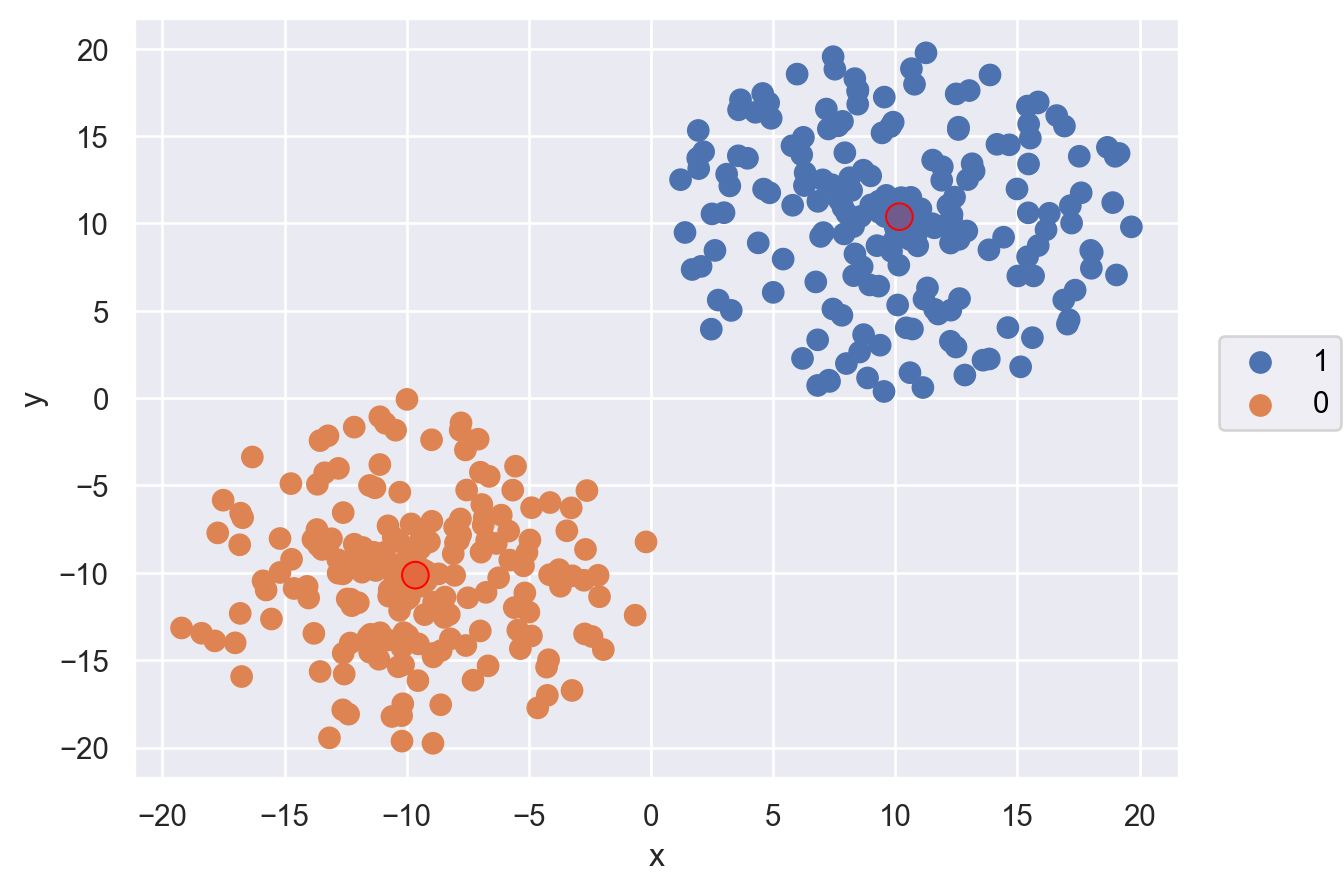

In [51]:
#Seteo de KMeans con 2 Clusters
kmeans = KMeans(n_clusters=2)

#Fiteo de la data que tenemos
etiquetas = kmeans.fit_predict(data2)

#Sacar centros del calculo de clusters
centros = kmeans.cluster_centers_

# Graficamos
(
    so.Plot()
    .add(so.Dot(pointsize = 8), data = data2, x="x",y="y", color = etiquetas.astype(str))
    .add(so.Dots(color = "red", pointsize= 10), x = centros[:,0], y = centros[:,1])
)

En la data2, vemos como los clusters son circulares y tienen diferentes centros, KMeans realizo el calculo perfectos

Como en data 1 tiene el mismo centro y por como funciona KMeans, vemos qque no puede realizar el ajuste

## Ejercicio 3

### a

In [38]:
data = pd.read_csv("../../Datasets/p7-iris.txt", sep="\t")

data

,LongSepalo,AnchoSepalo,LongPetalo,AnchoPetalo
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


### b

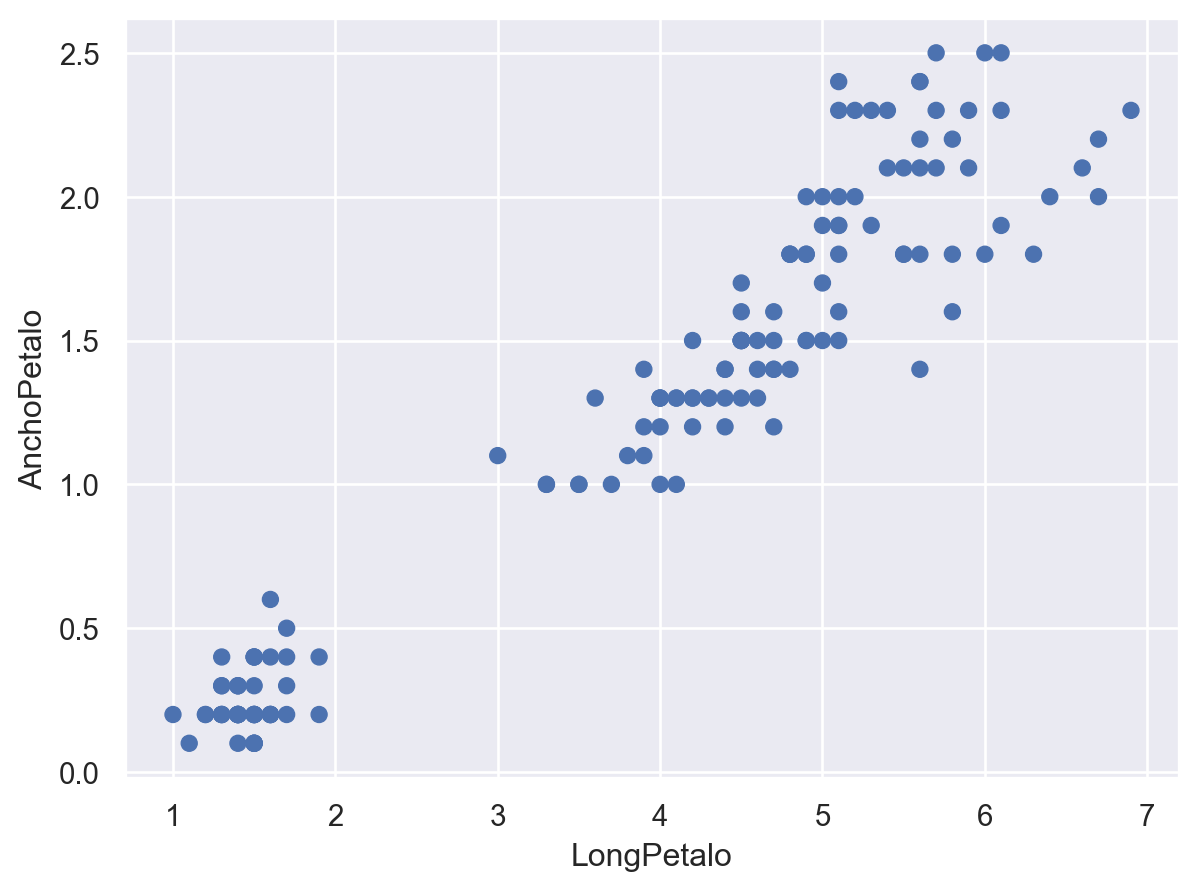

In [39]:
so.Plot(data = data, x="LongPetalo", y="AnchoPetalo").add(so.Dot())

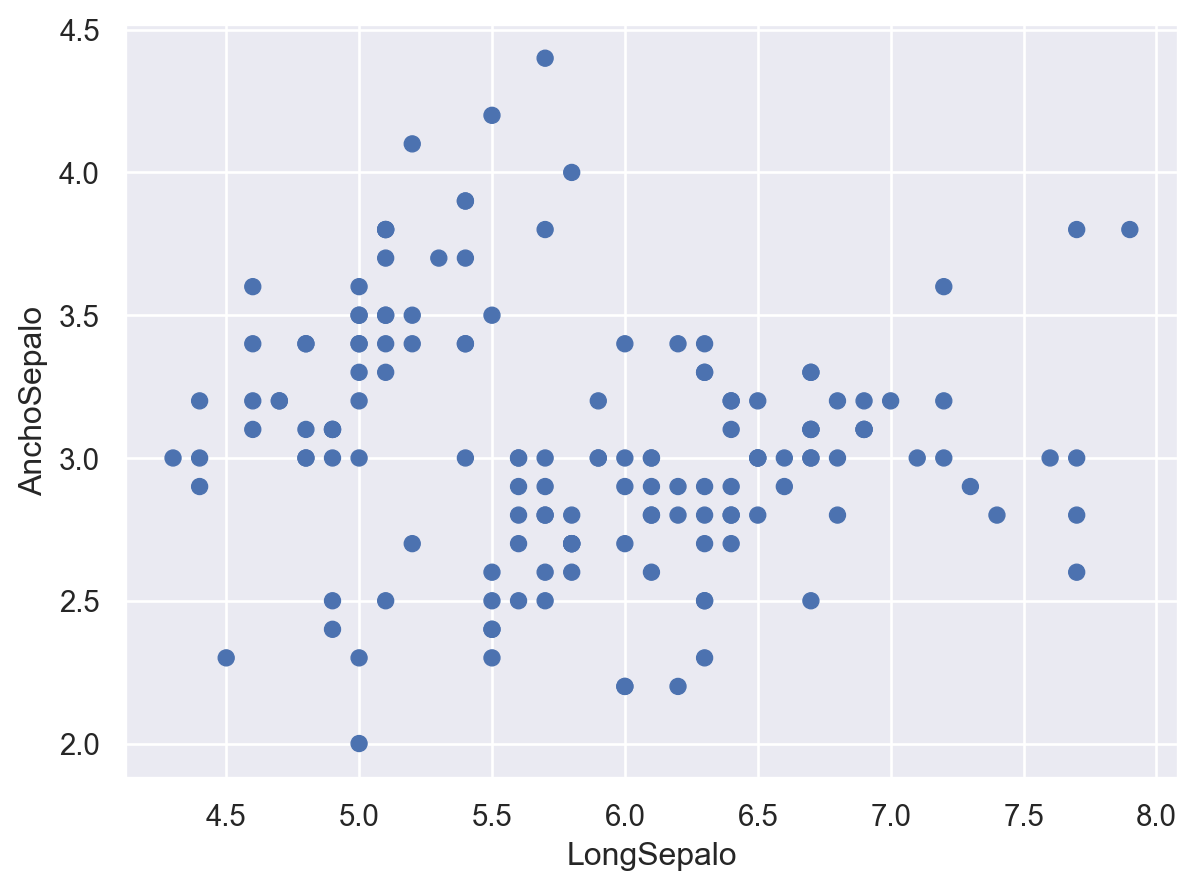

In [40]:
so.Plot(data = data, x="LongSepalo", y="AnchoSepalo").add(so.Dot())

### c

In [41]:
#Seteo de KMeans con 3 Clusters
kmeans = KMeans(n_clusters=3)

#Fiteo de la data que tenemos
etiquetas = kmeans.fit_predict(data)

centros = kmeans.cluster_centers_

### d

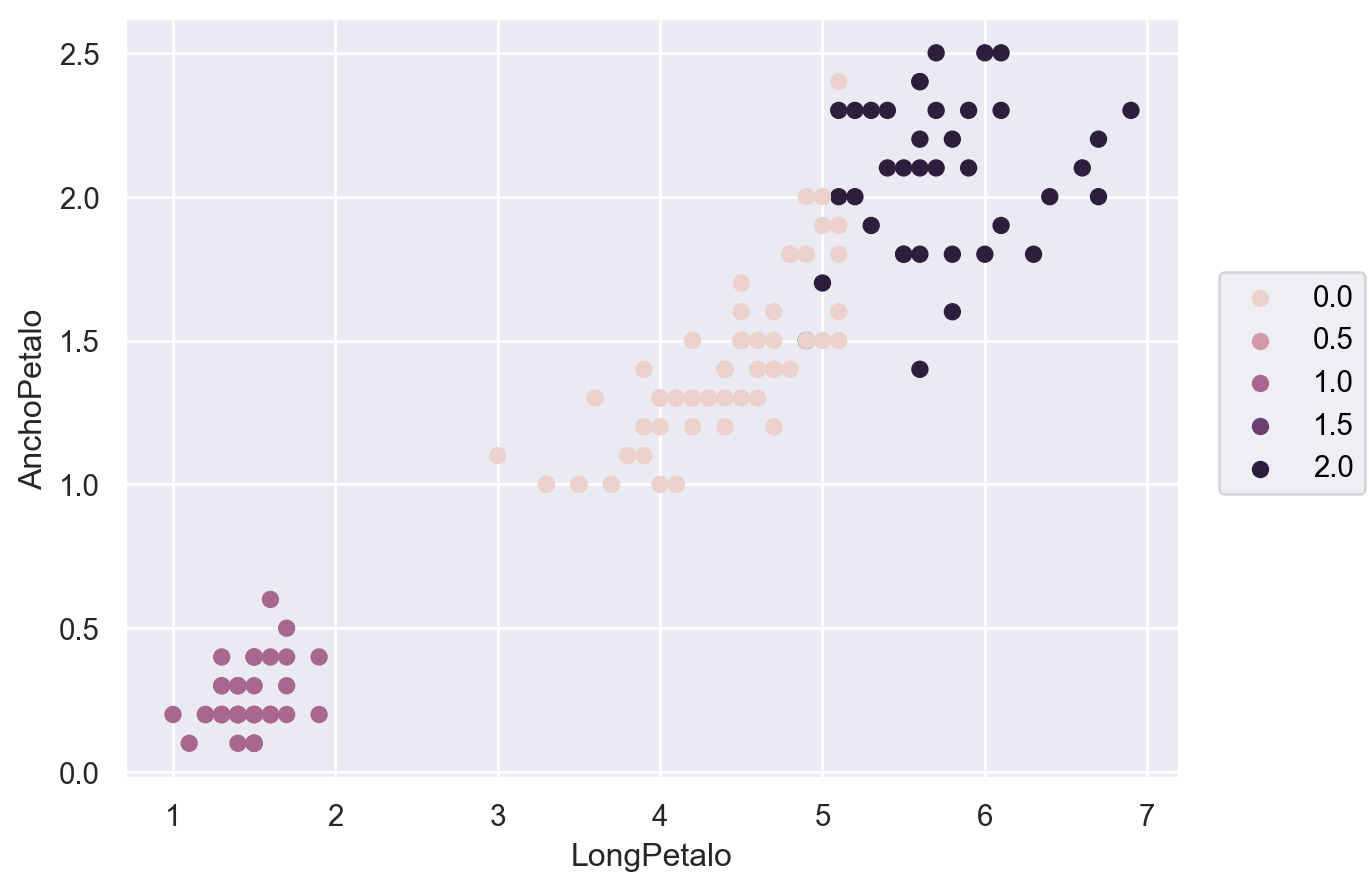

In [42]:
so.Plot(data = data, x="LongPetalo", y="AnchoPetalo").add(so.Dot(), color = etiquetas)

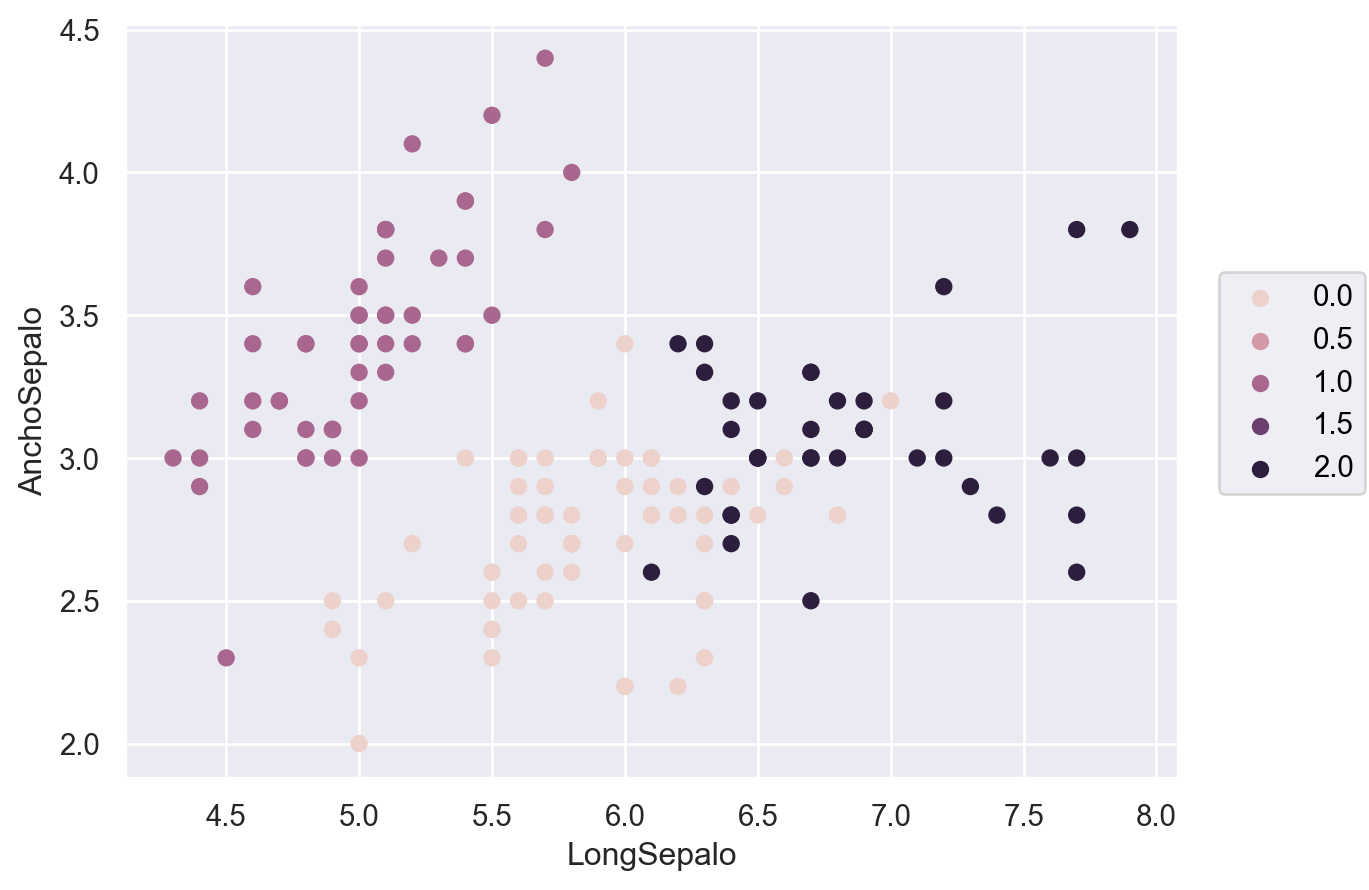

In [43]:
so.Plot(data = data, x="LongSepalo", y="AnchoSepalo").add(so.Dot(), color = etiquetas)

### e

In [46]:
# WCSS del KMeans
wcss = kmeans.inertia_
    
print('WCSS: ', wcss)

WCSS:  27.436686720142603


### f

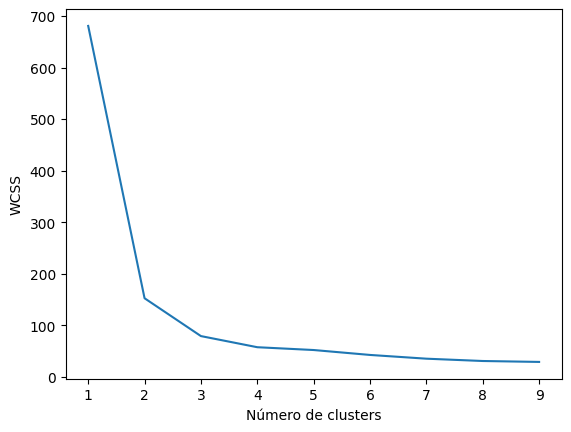

In [47]:
wcss = []

for i in range(1, 10):
    kmeans = KMeans(n_clusters = i)
    cluster = kmeans.fit_predict(data)
    wcss.append(kmeans.inertia_)
    
# Graficamos los resultados en un gráfico, y observamos en qué valor de k se da el "codo"
plt.plot(range(1, 10), wcss)

plt.xlabel('Número de clusters')
plt.ylabel('WCSS') # within cluster sum of squares (suma de cuadrados en cada cluster)
plt.show()

Bueno plantear pero se puede ver como despues de 4 o 5 ya el WCSS baja de tal escala que no vale la pena seguir

## Ejercicio 4

### a

In [71]:
data = pd.read_csv("../../Datasets/p7-dataSinEscalar.csv")

data

,x,y
0,0.002501,6488.267030
1,-0.026980,2521.947220
2,-0.029001,3068.772910
3,0.007030,4314.274820
4,-0.025356,2384.499450
...,...,...
395,0.002410,4810.405110
396,0.003557,4712.744040
397,0.012008,601.671730
398,0.000908,2873.527460


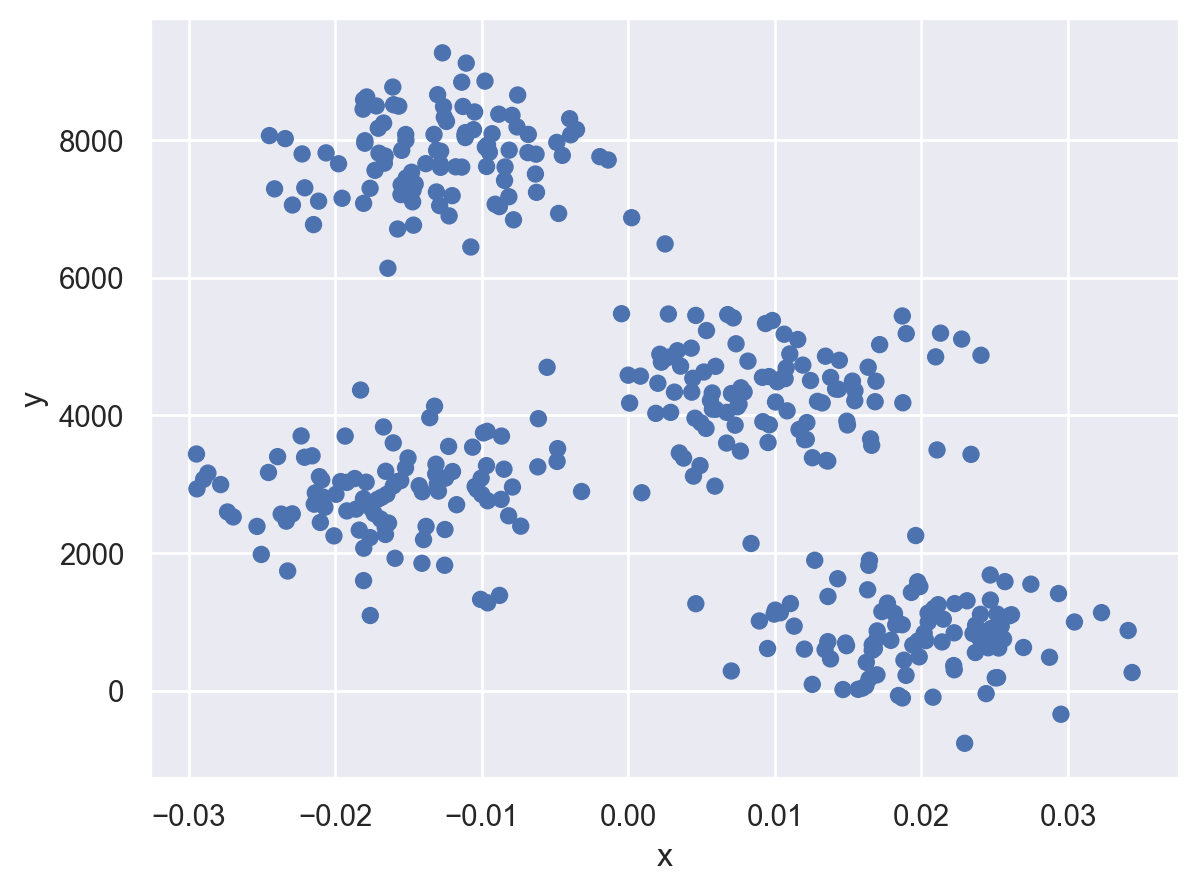

In [72]:
so.Plot(data=data, x='x', y="y").add(so.Dot())

### b

Se puede ver mas o menos un total de 4 clusters en el grafico los cuales estan arriba izquierda, abajo derecha y despues en la diagonal del medio donde hay uno a la izquierda y otro a la derecha

### c

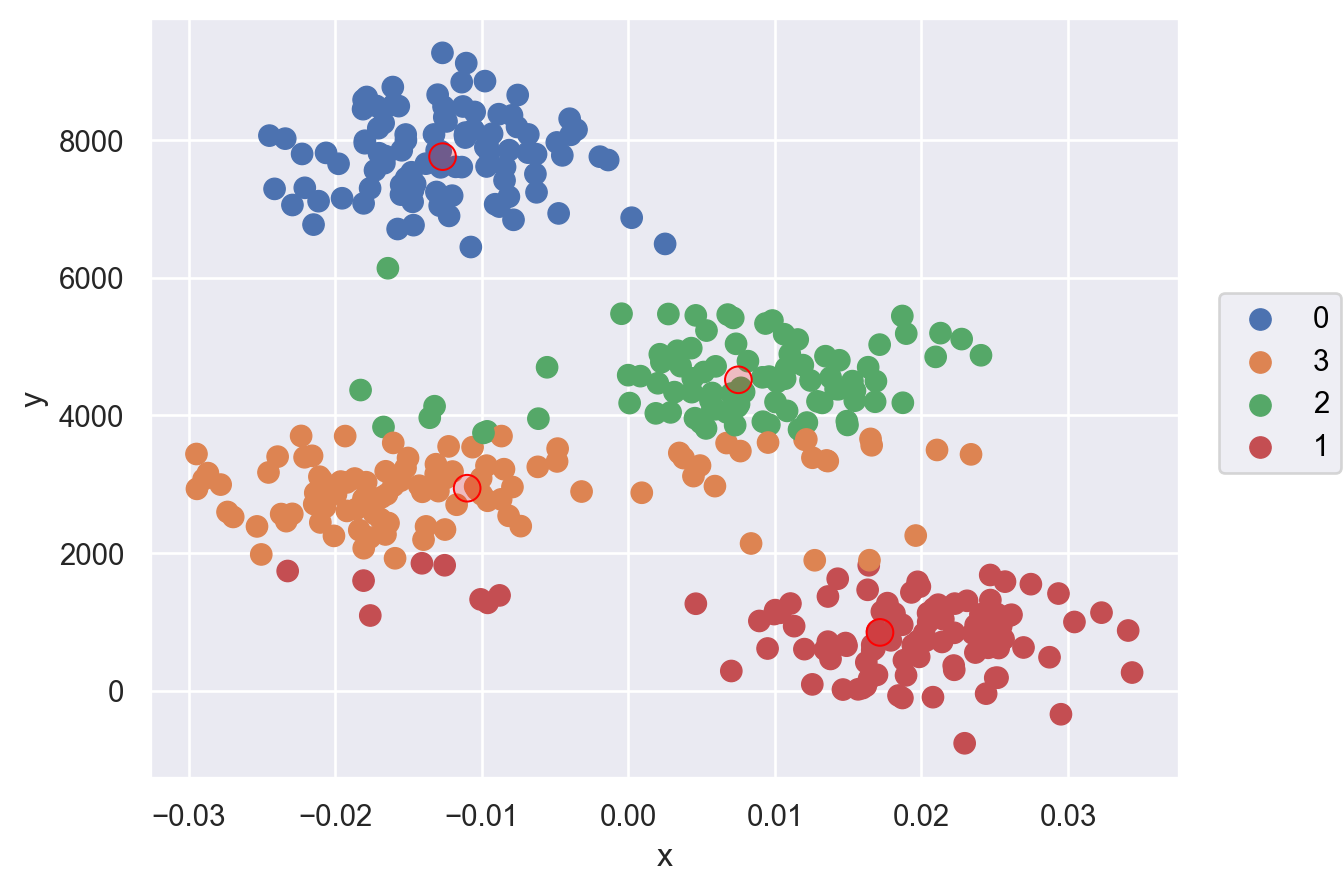

In [73]:
kmeans = KMeans(n_clusters=4)

kmeans.fit_predict(data)

etiquetas = kmeans.labels_
centros =kmeans.cluster_centers_

(
    so.Plot()
    .add(so.Dot(pointsize = 8), data = data, x="x",y="y", color = etiquetas.astype(str))
    .add(so.Dots(color = "red", pointsize= 10), x = centros[:,0], y = centros[:,1])
)

### d

No, parece que realizo lineas mas que circulos en este clustering

### e

In [75]:
#Crea el scaler que vamos a usar para escalar nuestro dataframe
scaler = MinMaxScaler().set_output(transform="pandas")

data = scaler.fit_transform(data)

data

,x,y
0,0.500874,0.723261
1,0.039251,0.327807
2,0.007607,0.382327
3,0.571790,0.506507
4,0.064673,0.314103
...,...,...
395,0.499456,0.555973
396,0.517419,0.546236
397,0.649751,0.136350
398,0.475941,0.362861


### f

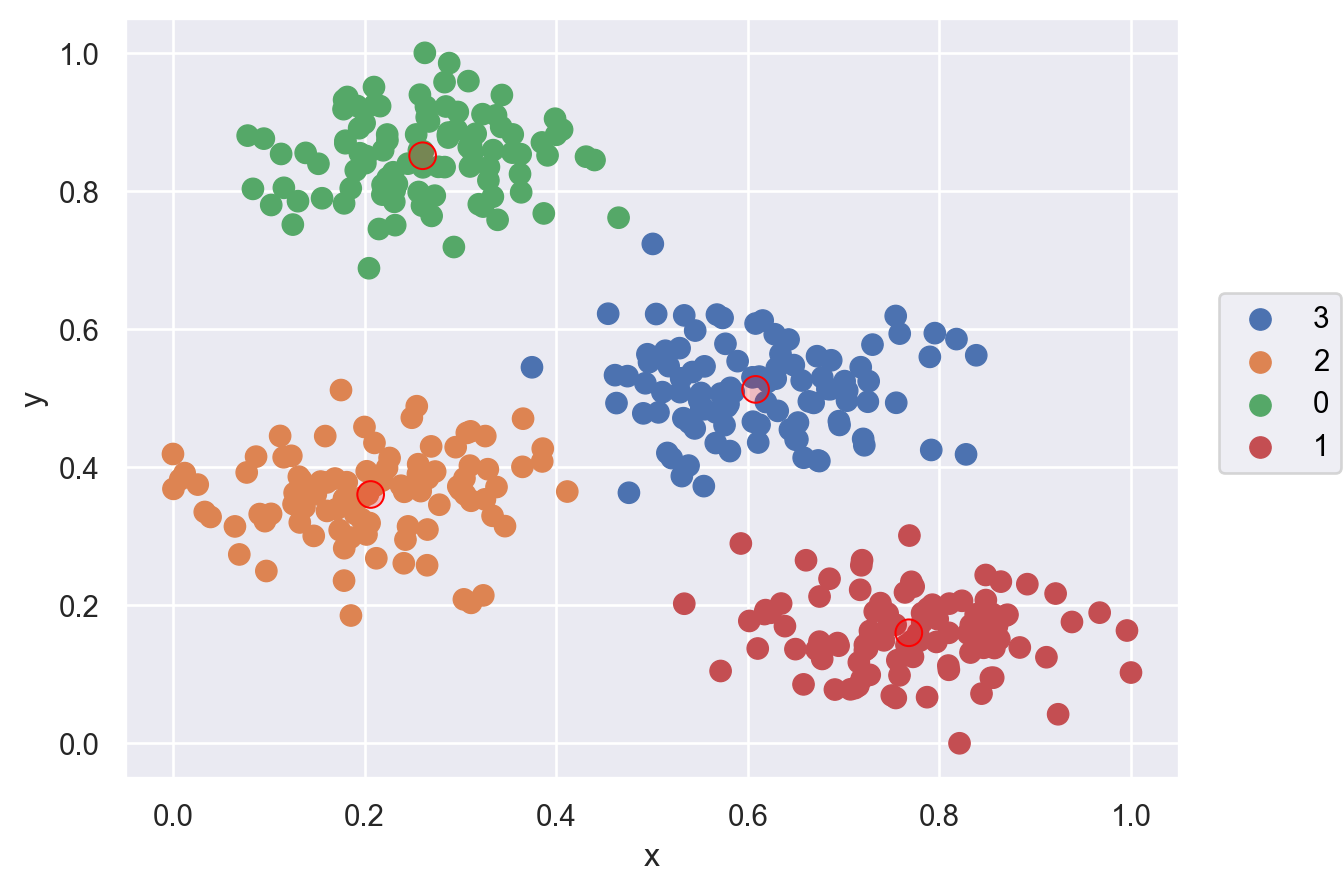

In [76]:
kmeans = KMeans(n_clusters=4)

kmeans.fit_predict(data)

etiquetas = kmeans.labels_
centros =kmeans.cluster_centers_

(
    so.Plot()
    .add(so.Dot(pointsize = 8), data = data, x="x",y="y", color = etiquetas.astype(str))
    .add(so.Dots(color = "red", pointsize= 10), x = centros[:,0], y = centros[:,1])
)

## Ejercicio 5

Queda pendiente, no tengo ganas de hacerlo pero es implementar DBSCan